# Text Classification

In this notebook we look at text classification in Scikit-learn. This involves learning a model from a training set of documents so we can accurately predict classes for new unlabeled documents.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

## Data Loading and Preprocessing

To demonstrate text classification we will train a classification model using a subset of a corpus of Internet newsgroup articles provided by Scikit-learn. Note this requires an internet connection to download the articles.

In [4]:
from sklearn.datasets import fetch_20newsgroups
# we will only download documents for 2 from 20 newsgroups: Space & Autos
target_categories = ["sci.space","rec.autos"]
newsgroups = fetch_20newsgroups(subset="train", categories=target_categories)

Extract the raw documents and the corresponding two class labels for those documents:

In [6]:
# the raw documents to use for training
train_documents = newsgroups.data
# the corresponding class labels to use for training
train_target = newsgroups.target
target_names = newsgroups.target_names
print("Training set has %d documents. Target classes are %s" % (len(train_documents), set(target_names)))

Training set has 1187 documents. Target classes are {'sci.space', 'rec.autos'}


Apply standard text pre-processing steps to create a document-term matrix:

In [12]:
# we can pass in the same preprocessing parameters
vectorizer = TfidfVectorizer(stop_words="english",min_df = 10)
X = vectorizer.fit_transform(train_documents)
print(X.shape)

(1187, 2729)


In [18]:
terms = vectorizer.get_feature_names_out()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 2729 distinct terms


In [20]:
# Display a set of sample terms
print(terms[200:220])

['adequate' 'administration' 'administrator' 'admit' 'ads' 'advance'
 'advanced' 'advantage' 'advertising' 'advice' 'aeronautics' 'aerospace'
 'afford' 'aftermarket' 'age' 'agencies' 'agency' 'ago' 'agree' 'agreed']


## Term Frequency Analysis

Once we have constructed a document-term matrix, a simple analysis procedure is to identify the most frequent terms (or the highest weighted terms, after TF-IDF is applied).

In [28]:
# sum over the columns
freqs = X.sum(axis=0)

[[4.05815232 8.16481317 1.17038472 ... 1.76476931 8.91035459 5.92665001]]


In [24]:
# sort the indexes of the array by value, and then reverse it
sorted_term_indexes = freqs.argsort()
sorted_term_indexes = sorted_term_indexes[0, ::-1]

In [26]:
# display the top 20 terms
for i in range(20):
    term_index = sorted_term_indexes[0,i]
    print("%d. %s = %.2f" % ((i+1), terms[term_index], freqs[0,term_index] ))

1. edu = 63.39
2. com = 49.00
3. space = 38.42
4. car = 35.62
5. subject = 28.77
6. article = 28.67
7. writes = 28.51
8. organization = 28.18
9. lines = 28.09
10. nasa = 24.71
11. just = 24.62
12. like = 24.16
13. university = 23.08
14. posting = 22.99
15. nntp = 21.70
16. host = 21.62
17. don = 21.31
18. access = 19.25
19. ca = 18.66
20. cars = 17.94


## Classifying Documents

If we consider the annotated class labels (targets) for this corpus subset, a more interesting application to predict a label for newsgroup posts, from one of either of the two classes in the data.

We will use the training documents and corresponding class labels to train a KNN classifier with 3 neighbours.

In [34]:
model = KNeighborsClassifier(n_neighbors=3)
# build a model on the document-term matrix created from the original set of documents
model.fit(X, train_target)

KNeighborsClassifier(n_neighbors=3)

We can also use the test data provided by Scikit-learn for the same Internet newsgroup corpus. Again we need to download this dataset the first time that we want to use it.

In [36]:
# retrieve test dat for the categories that we want
test_newsgroups = fetch_20newsgroups(subset="test", categories=target_categories)

In [44]:
# text content for the test documents
test_documents = test_newsgroups.data
# class labels for the test documents
test_target = test_newsgroups.target
test_target_names = test_newsgroups.target_names
print("Test set has %d documents. Target classes are %s" % (len(test_documents), set(test_target_names)))

Test set has 790 documents. Target classes are {'sci.space', 'rec.autos'}


We also convert the test set to document-term matrix. Note that we call *transform()* not *fit_transform()*. This ensure that we use the same terms as the original training set.

In [46]:
test_X = vectorizer.transform(test_documents)
print(test_X.shape)

(790, 2729)


Now we can make prediction for the documents in the test set and evaluate the accuracy of the predictions:

In [68]:
predicted = model.predict(test_X)
predicted

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,

In [50]:
acc = accuracy_score(test_target, predicted)
print("Classification accuracy = %.4f" % acc)

Classification accuracy = 0.9165


We can also look at the resulting confusion matrix to see where the classification errors lie.

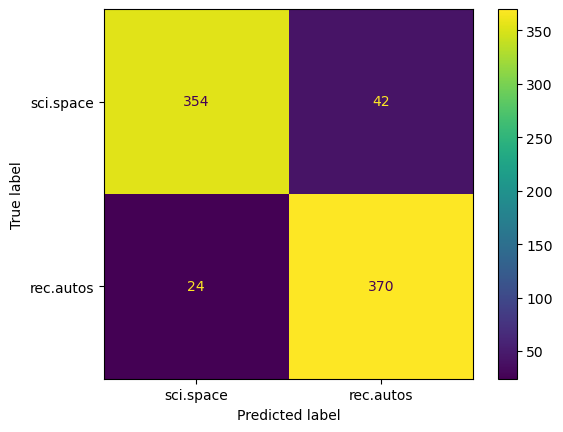

In [52]:
# calculate the confusion matrix
cm = confusion_matrix(test_target, predicted)
# display it graphically
cmd = ConfusionMatrixDisplay(cm, display_labels=target_categories)
cmd.plot();

## Classification Pipelines

Text classification can often involve multiple steps, including different preprocessing techniques and the classification step itself.

To make this process easier, Scikit-learn provides a class called *Pipeline* that connects these steps together. This makes it easy to repeatedly apply a full classification workflow, and also allows us to customise each step if necessary.

Pipelines are also useful if we want to apply the same sequence of steps to several different datasets.

In [54]:
from sklearn.pipeline import Pipeline
# define the steps in the pipeline
# note the names vec, tfidf and clf are arbitrary
pipeline1 = Pipeline([
    ('vec', CountVectorizer(stop_words="english")),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=3))
])

Now we can train the model using the pipeline:

In [ ]:
pipeline1.fit(train_documents, train_target)

And then re-use the pipeline to test the model on the set of test documents:

In [ ]:
predicted = pipeline1.predict(test_documents)
print("Classification accuracy = %.4f" % accuracy_score(test_target, predicted))

We could easily change various aspects of the pipeline to see how this affects classification performance. In this case we will use a linear Support Vector Machine (SVM) classifier:

In [ ]:
from sklearn.linear_model import SGDClassifier
pipeline2 = Pipeline([
    ('vec', CountVectorizer(stop_words="english")),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier())
])

Now use the pipeline to train and test as before:

In [ ]:
pipeline2.fit(train_documents, train_target)

In [ ]:
predicted = pipeline2.predict(test_documents)
print("Classification accuracy = %.4f" % accuracy_score(test_target, predicted))